In [1]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
# plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=5)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [166]:
eos_data = pd.read_csv('eos_24_lowmass.dat', header = 0, delim_whitespace=True)
names = list(eos_data.columns.values)

Bdat = pd.read_csv('B_data.dat', sep="\t", header = None)

In [167]:
names

['r(km)',
 'M(Msun)',
 'nb(fm^-3)',
 'Ye',
 'Ymu',
 'Yp',
 'Yn',
 'mu_n(MeV)',
 'mu_p(MeV)',
 'mu_e(MeV)',
 'mu_mu(MeV)',
 'P(dyncm^-2)']

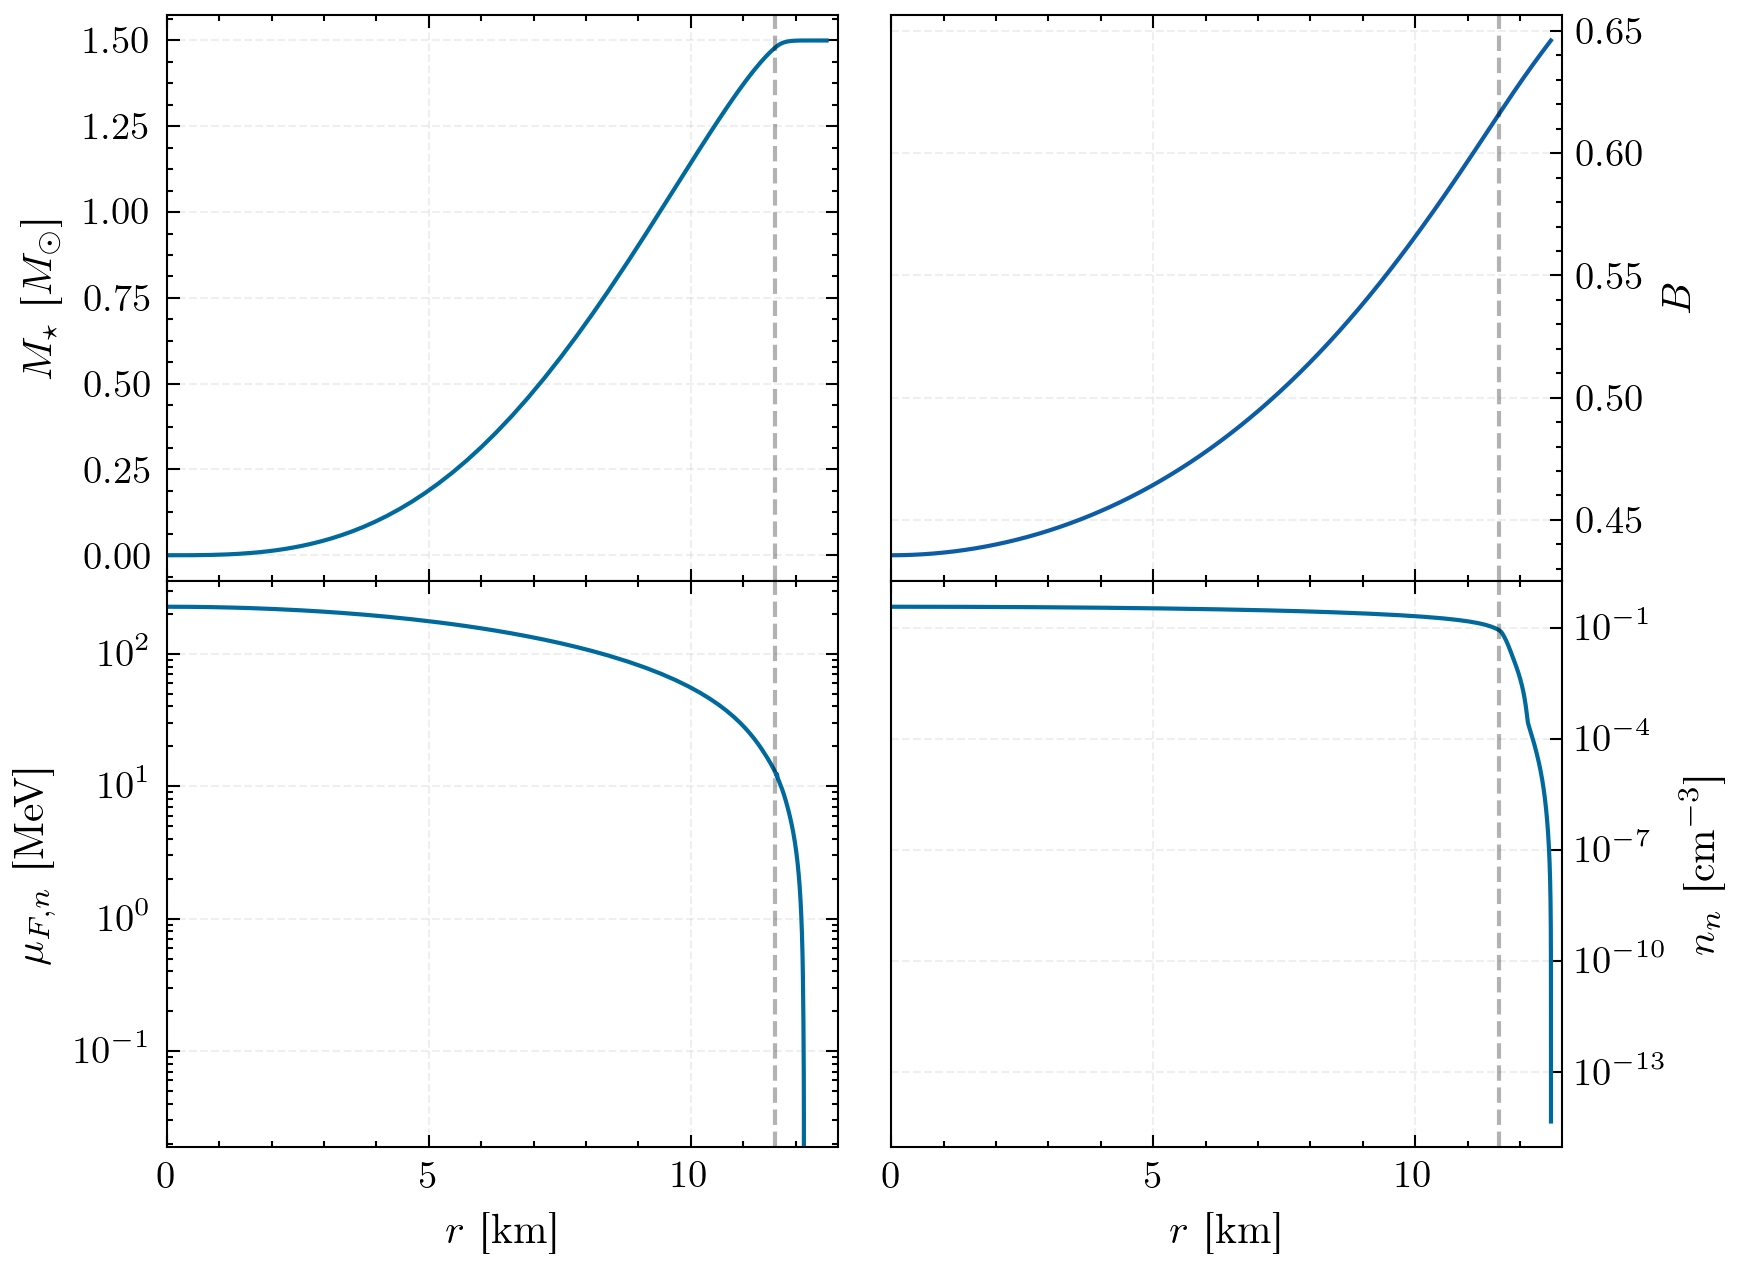

In [175]:
fig, ax = plt.subplots(2, 2, figsize = (6,5), dpi = 300 , sharex = True)
fig.subplots_adjust(hspace=0, wspace=0.08)

ax[0,0].plot(eos_data[[names[0]]], eos_data[[names[1]]], color = '#006a9c')
ax[0,0].set_ylabel('$M_\star$ [$M_\odot$]')
ax[0,0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
ax[0,0].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')

# # ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[3]]], color = '#f0bc02')
# # ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[4]]], color = '#43b859')
# # ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[5]]], color = '#0097a1')
# ax[0,1].plot(eos_data[[names[0]]], eos_data[[names[6]]], color = '#006a9c')
# # ax[0,1].set_yscale('log')
# ax[0,1].set_ylabel('$Y_n$')
# ax[0,1].axvline(11.6, color = 'black', alpha = 0.3, linestyle = ':')
# ax[0,1].yaxis.set_label_position("right")
# ax[0,1].yaxis.tick_right()

ax[0,1].plot(Bdat[[0]], Bdat[[1]])
ax[0,1].set_ylabel('$B$')
ax[0,1].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')
ax[0,1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()

ax[1,0].plot(eos_data[[names[0]]], eos_data[[names[7]]], color = '#006a9c')
ax[1,0].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')
ax[1,0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
ax[1,0].set_yscale('log')
ax[1,0].set_ylabel('$\mu_{F,n}$ [MeV]')
ax[1,0].set_xlabel('$r$ [km]')
ax[1,0].set_xlim(0, 12.7)

ax[1,1].plot(eos_data[[names[0]]], np.asarray(eos_data[names[2]].tolist()) * np.asarray(eos_data[names[6]].tolist()), color = '#006a9c')
ax[1,1].axvline(11.6, color = 'black', alpha = 0.3, linestyle = '--')
ax[1,1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('$n_n$ [cm$^{-3}$]')
ax[1,1].yaxis.set_label_position("right")
ax[1,1].set_xlabel('$r$ [km]')
ax[1,1].set_xlim(0, 12.8)
ax[1,1].yaxis.tick_right()

plt.savefig('ns_eos.pdf')

In [169]:
np.asarray(eos_data[names[2]].tolist()) * np.asarray(eos_data[names[6]].tolist())

array([3.74951668e-01, 3.74951389e-01, 3.74950598e-01, 3.74949272e-01,
       3.74946335e-01, 3.74941797e-01, 3.74934164e-01, 3.74922995e-01,
       3.74906305e-01, 3.74883122e-01, 3.74851754e-01, 3.74810200e-01,
       3.74755699e-01, 3.74686865e-01, 3.74599799e-01, 3.74491942e-01,
       3.74359479e-01, 3.74199466e-01, 3.74007246e-01, 3.73778140e-01,
       3.73507440e-01, 3.73189954e-01, 3.72820426e-01, 3.72392233e-01,
       3.71899082e-01, 3.71333710e-01, 3.70689145e-01, 3.69956992e-01,
       3.69128682e-01, 3.68195877e-01, 3.67148332e-01, 3.65975982e-01,
       3.64667648e-01, 3.63212661e-01, 3.61597497e-01, 3.59810269e-01,
       3.57836117e-01, 3.55660397e-01, 3.53266516e-01, 3.50637384e-01,
       3.47753596e-01, 3.44594722e-01, 3.41137726e-01, 3.37356054e-01,
       3.33221530e-01, 3.28699437e-01, 3.23750246e-01, 3.18325866e-01,
       3.12365059e-01, 3.05787760e-01, 2.98670526e-01, 2.91168768e-01,
       2.83283898e-01, 2.75018786e-01, 2.66378063e-01, 2.54484126e-01,
      